# Introduction

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
#import pickle5 as pickle

In [ ]:
# Import dan read Datasets
url='https://docs.google.com/spreadsheets/d/1GuLtVY6Hl7nHzONz1TeSk7uxG6FGJlIfvsRNP_2To3o/edit#gid=1704076245'
url= url.replace('/edit#gid=', '/export?format=csv&gid=')
heart = pd.read_csv(url)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**About  Dataset**
- Age: age of the patient in years
- Sex: sex of the patient (M: Male, F: Female)
- ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- RestingBP: resting blood pressure in mmHg
- Cholesterol: serum cholesterol in mm/dl
- FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- RestingECG: resting electrocardiogram results
Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina (Y: Yes,N: No)
- Oldpeak: oldpeak : ST Numeric value measured in depression
- ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
- HeartDisease: output class (1: heart disease, 0: Normal)

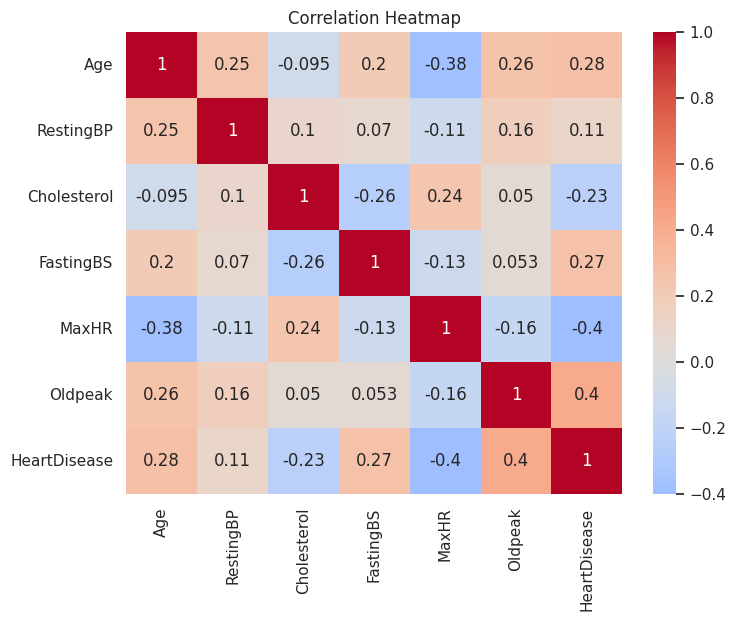

In [ ]:
# Select numeric columns for correlation calculation
numeric_columns = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

# Calculate correlation matrix
correlation_matrix = heart[numeric_columns].corr()

# Set up the seaborn style
sns.set(style="white")

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Menampilkan informasi tiap kolom dari datasaet
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Pertama, mengecek proporsi jumlah missing values yang terdapat pada setiap features.
# Kedua, mengecek jumlah data yang terduplikasi.

print("Missing values proportion:")
print(heart.isnull().sum()/heart.shape[0]) # Untuk menghitung proporsi dari missing values pada setiap features/kolom.
print("="*50)
print("Duplicate data:")
print(heart.duplicated().sum()) # Untuk menghitung jumlah data yang terduplikasi.

Missing values proportion:
Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64
Duplicate data:
0


# EDA

In [ ]:
# print a summary of the data
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


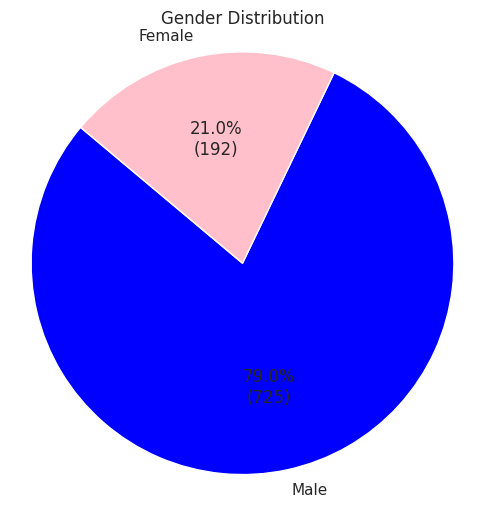

In [ ]:
# Data
labels = ['Male', 'Female']
sizes = heart['Sex'].value_counts()

# Custom autopct function to show count per category
def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return f"{pct:.1f}%\n({absolute})"

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes),
        startangle=140, colors=['blue', 'pink'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

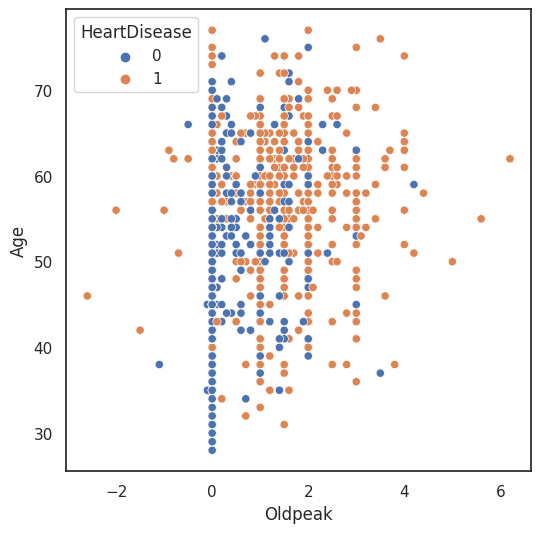

In [ ]:
# Visualkan Data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x = "Oldpeak",
                y = "Age",
                hue = "HeartDisease",
                data = heart,
                ax = ax)
plt.show()

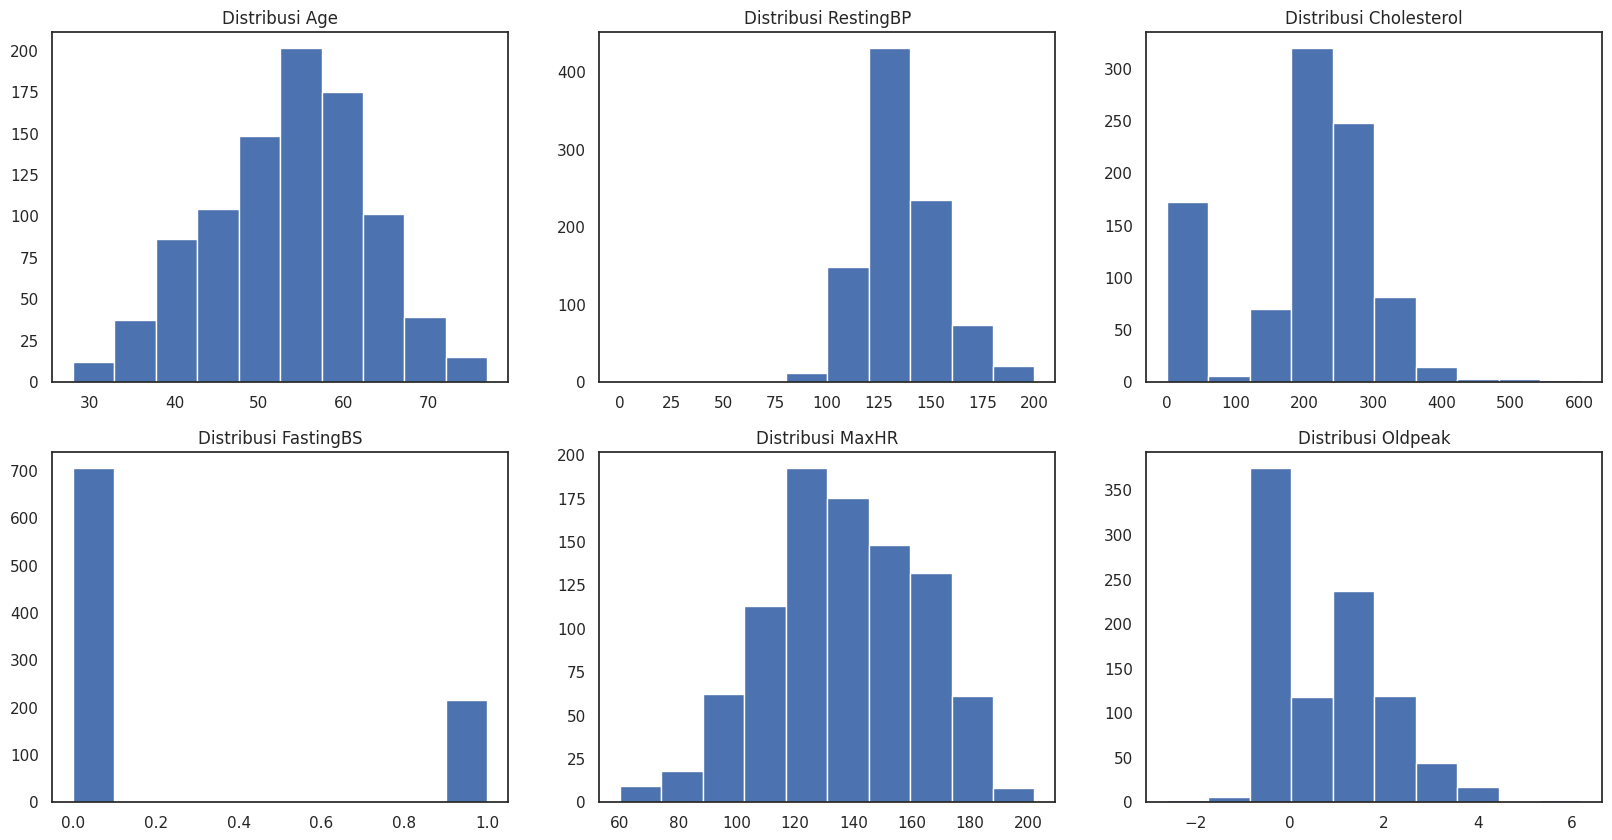

In [ ]:
# Melihat distribusi setiap variable
columns_ = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak']
index_ = 0
fig, ax = plt.subplots(2,3, figsize = (20,10)) # membuat figur dan axis untuk subplots
for row in range(2):
    for col in range(3):
        ax[row,col].hist(heart[columns_[index_]])
        ax[row,col].set_title(f"Distribusi {columns_[index_]}")
        index_ += 1
plt.show()

In [ ]:
heart.groupby(["HeartDisease","Sex"])["Sex"].agg({"count"})

count
HeartDisease Sex       
0            F      143
             M      267
1            F       50
             M      458

[Text(0.5, 1.0, 'Gender vs HeartDisease')]

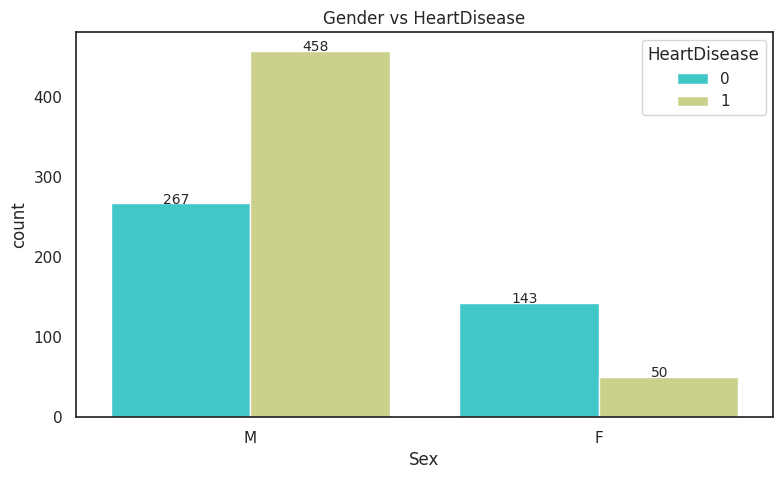

In [ ]:
# Function to create barplots that count for each category.
def bar_count(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()         # hieght of the plot
        plot.annotate('{:.0f}'.format(count), (x, y), size = 10)  # annotate count value

# gender vs Is_promoted
plt.figure(figsize=(9,5))
ax=sns.countplot(x='Sex',hue='HeartDisease',data=heart,palette='rainbow')
bar_count(ax,heart['HeartDisease'])
ax.set(title="Gender vs HeartDisease")

In [ ]:
# Menggunakan One-Hot Encoding untuk mengubah kolom-kolom tertentu
heart1 = pd.get_dummies(heart, columns=['Sex','ST_Slope', 'ChestPainType', 'RestingECG', 'ExerciseAngina'], drop_first=True)

# Tampilkan hasil encoding
heart1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,40,140,289,0,172,0.0,0,1,0,1,1,0,0,1,0,0
1,49,160,180,0,156,1.0,1,0,1,0,0,1,0,1,0,0
2,37,130,283,0,98,0.0,0,1,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,1,0,0,0,1,1,0,0
914,68,144,193,1,141,3.4,1,1,1,0,0,0,0,1,0,0
915,57,130,131,0,115,1.2,1,1,1,0,0,0,0,1,0,1
916,57,130,236,0,174,0.0,1,0,1,0,1,0,0,0,0,0


# Logistic Regression dengan sklearn

In [ ]:
# Buat input & output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = heart1,
                          target_column = "HeartDisease")

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,40,140,289,0,172,0.0,1,0,1,1,0,0,1,0,0
1,49,160,180,0,156,1.0,0,1,0,0,1,0,1,0,0
2,37,130,283,0,98,0.0,1,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,0,1,0,0,0,0,1,0,1
4,54,150,195,0,122,0.0,1,0,1,0,1,0,1,0,0


In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

## Split train & test

In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                    random_state = 123)

In [ ]:
y_train.value_counts()

1    406
0    328
Name: HeartDisease, dtype: int64

In [ ]:
y_train.value_counts(normalize = True)

1    0.553134
0    0.446866
Name: HeartDisease, dtype: float64

In [ ]:
y_test.value_counts()

1    102
0     82
Name: HeartDisease, dtype: int64

In [ ]:
y_test.value_counts(normalize = True)

1    0.554348
0    0.445652
Name: HeartDisease, dtype: float64

Tentukan baseline model

- Buat random guess berdasarkan proporsi kelas
- Probability HeartDisease adalah ~55% dan non-HeartDisease ~45%
- Gunakan DummyClassifier

## BASELINE PROPORSI KELAS TERBESAR

In [ ]:
from sklearn.dummy import DummyClassifier
# Buat objek
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train,
              y = y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
# Predict
y_pred_dummy = dummy_clf.predict(X_train)

In [ ]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = y_pred_dummy)


array([[  0, 328],
       [  0, 406]])

In [ ]:
# Cari score
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_dummy)

# Sama seperti proporsi kelas terbesar

0.553133514986376

## BASELINE PRIOR CLASS PROBABILITY

In [ ]:
# Odds of guessing minority correct:
proba_minority = 0.34
proportion_minority = y_train.value_counts(normalize = True)[1]

odds_minority = proba_minority * proportion_minority
odds_minority

0.18806539509536785

In [ ]:
# Odds of guessing majority correct:
proba_majority = 0.66
proportion_majority = y_train.value_counts(normalize = True)[0]

odds_majority = proba_majority * proportion_majority
odds_majority

0.29493188010899185

In [ ]:
# Odds total
odds_minority + odds_majority

0.4829972752043597

In [ ]:
y_train.head()

774    1
435    0
904    0
469    0
514    1
Name: HeartDisease, dtype: int64

In [ ]:
y_train.value_counts(normalize=True)

1    0.553134
0    0.446866
Name: HeartDisease, dtype: float64

In [ ]:
y_test.head()

862    0
161    1
872    1
47     0
300    1
Name: HeartDisease, dtype: int64

In [ ]:
y_test.value_counts(normalize=True)

1    0.554348
0    0.445652
Name: HeartDisease, dtype: float64

## Scaling Data

In [ ]:
# Scaling Data
from sklearn.preprocessing import StandardScaler

# Buat scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Convert X_train & X_test
def scaler_transform(data, scaler):
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.columns = data.columns
    data_scaled.index = data.index

    return data_scaled


In [ ]:
X_train_scaled = scaler_transform(data = X_train,
                                  scaler = scaler)
X_train_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
774,1.317889,2.493831,0.273903,1.835497,1.095329,0.104773,-1.940679,0.986468,-0.857452,-0.481190,-0.536395,-0.223767,0.815107,-0.479041,1.202775
435,0.688936,1.076213,-1.796387,-0.544812,-0.749633,-0.835368,0.515284,-1.013718,1.166246,-0.481190,-0.536395,-0.223767,-1.226833,2.087502,1.202775
904,0.269633,-0.668548,0.382866,-0.544812,1.252347,-0.835368,0.515284,-1.013718,-0.857452,2.078182,-0.536395,-0.223767,0.815107,-0.479041,-0.831411
469,0.269633,-0.450453,0.237583,1.835497,0.938311,1.044914,0.515284,0.986468,-0.857452,2.078182,-0.536395,-0.223767,0.815107,-0.479041,-0.831411
514,-1.093100,-0.559500,-1.796387,-0.544812,-0.671124,-0.365297,0.515284,-1.013718,1.166246,-0.481190,-0.536395,-0.223767,0.815107,-0.479041,-0.831411


In [ ]:
X_test_scaled = scaler_transform(data = X_test,
                                 scaler = scaler)
X_test_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
862,1.213064,1.239784,0.646192,-0.544812,0.428002,-0.083255,-1.940679,-1.013718,1.166246,-0.481190,1.864299,-0.223767,0.815107,-0.479041,-0.831411
161,-0.464146,-0.232357,0.128620,-0.544812,-1.613232,-0.835368,0.515284,0.986468,-0.857452,-0.481190,-0.536395,-0.223767,0.815107,-0.479041,1.202775
872,0.164808,-0.014262,1.408931,-0.544812,-0.200070,0.292801,0.515284,0.986468,-0.857452,-0.481190,-0.536395,-0.223767,0.815107,-0.479041,1.202775
47,-0.359320,0.421928,0.164941,-0.544812,1.291601,-0.835368,0.515284,-1.013718,1.166246,2.078182,-0.536395,-0.223767,0.815107,-0.479041,-0.831411
300,0.688936,1.512403,-1.796387,1.835497,0.467257,-0.459311,0.515284,0.986468,-0.857452,-0.481190,-0.536395,-0.223767,0.815107,-0.479041,-0.831411


## Buat Objek & Fitting

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression


In [ ]:
# Buat weight class
n_samples = len(y_train)
n_classes = len(y_train.value_counts())
n_samples_j = y_train.value_counts()

class_weight = n_samples / (n_classes * n_samples_j)
class_weight

# Kita kasih weight yang lebih besar untuk kelas 1

1    0.903941
0    1.118902
Name: HeartDisease, dtype: float64

In [ ]:
# Buat objek
logreg = LogisticRegression(class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 123)

In [ ]:
# Lakukan eksperimentasi
from sklearn.model_selection import GridSearchCV

search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

In [ ]:
# Lakukan Fitting Data
logreg_cv.fit(X = X_train_scaled,
              y = y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1.1189024390243902,
                                                        1: 0.9039408866995073},
                                          random_state=123,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [ ]:
# Best params
logreg_cv.best_params_

{'C': 0.1623776739188721, 'penalty': 'l2'}

In [ ]:
# Buat best model
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1623776739188721,
                   class_weight={0: 1.1189024390243902, 1: 0.9039408866995073},
                   random_state=123, solver='liblinear')

## Predict & Evaluate

Train Dataset

In [ ]:
##Predict & Evaluate

#Train Dataset

# Buat prediksi probability
y_pred_train_proba = logreg.predict_proba(X_train_scaled)
y_pred_train_proba

# [1 - P(y = 1), P(y = 1)]

array([[0.11214359, 0.88785641],
       [0.30885338, 0.69114662],
       [0.91969523, 0.08030477],
       ...,
       [0.96078402, 0.03921598],
       [0.0514061 , 0.9485939 ],
       [0.09206965, 0.90793035]])

In [ ]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_train

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train,
                 y_pred = y_pred_train)

# [[tp, fp]]
# [[fn, tn]]

array([[277,  51],
       [ 46, 360]])

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["not Heart Disease", " Heart Disease"]))

                   precision    recall  f1-score   support

not Heart Disease       0.86      0.84      0.85       328
    Heart Disease       0.88      0.89      0.88       406

         accuracy                           0.87       734
        macro avg       0.87      0.87      0.87       734
     weighted avg       0.87      0.87      0.87       734



# Test Dataset

In [ ]:
#Test Dataset

# Buat prediksi probability
y_pred_test_proba = logreg.predict_proba(X_test_scaled)
y_pred_test_proba

# Buat prediksi probability
y_pred_test_proba = logreg.predict_proba(X_test_scaled)
y_pred_test_proba


array([[0.97746131, 0.02253869],
       [0.09035592, 0.90964408],
       [0.11407532, 0.88592468],
       [0.95839891, 0.04160109],
       [0.04796203, 0.95203797],
       [0.90968581, 0.09031419],
       [0.03638966, 0.96361034],
       [0.95331615, 0.04668385],
       [0.86104257, 0.13895743],
       [0.05971015, 0.94028985],
       [0.19126851, 0.80873149],
       [0.06445441, 0.93554559],
       [0.62720032, 0.37279968],
       [0.71068081, 0.28931919],
       [0.95771309, 0.04228691],
       [0.96768046, 0.03231954],
       [0.95153524, 0.04846476],
       [0.95886839, 0.04113161],
       [0.94136455, 0.05863545],
       [0.95097596, 0.04902404],
       [0.15156885, 0.84843115],
       [0.19032226, 0.80967774],
       [0.8680773 , 0.1319227 ],
       [0.25124032, 0.74875968],
       [0.03832647, 0.96167353],
       [0.24745492, 0.75254508],
       [0.95946944, 0.04053056],
       [0.07693081, 0.92306919],
       [0.96994343, 0.03005657],
       [0.04268285, 0.95731715],
       [0.

In [ ]:
y_pred_test = logreg.predict(X_test_scaled)
y_pred_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test)

# [[tp, fp]]
# [[fn, tn]]

array([[73,  9],
       [15, 87]])

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["not Heart Disease", " Heart Disease"]))

                   precision    recall  f1-score   support

not Heart Disease       0.83      0.89      0.86        82
    Heart Disease       0.91      0.85      0.88       102

         accuracy                           0.87       184
        macro avg       0.87      0.87      0.87       184
     weighted avg       0.87      0.87      0.87       184



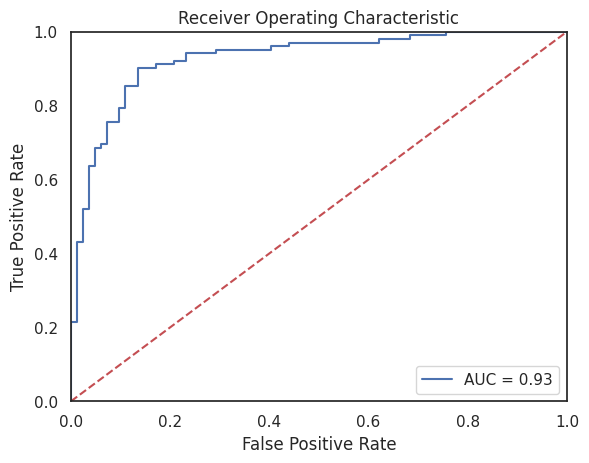

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_test_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tampilkan hasil logistic regression

In [ ]:
#Tampilkan hasil logistic regression

# Koefisien/slope logistic regression
logreg.coef_
# Koefisien/slope logistic regression
logreg.coef_

array([[ 0.0756148 ,  0.03966423, -0.40172222,  0.44933606, -0.20822   ,
         0.43685424,  0.54604669,  0.65962649, -0.38246372, -0.67049893,
        -0.61397324, -0.1704258 , -0.05533916, -0.0997595 ,  0.51689233]])

In [ ]:
# Intercept linear regression
logreg.intercept_

array([0.1046043])

In [ ]:
coefficients = logreg.coef_[0]  # Coefficients for all features
intercept = logreg.intercept_[0]  # Intercept term

for i, coef in enumerate(coefficients):
    print(f"Coefficient for feature {i + 1}: {coef}")

print(f"Intercept: {intercept}")


Coefficient for feature 1: 0.0756147990434355
Coefficient for feature 2: 0.03966423048877587
Coefficient for feature 3: -0.4017222162676342
Coefficient for feature 4: 0.4493360595104734
Coefficient for feature 5: -0.20822000396296353
Coefficient for feature 6: 0.4368542438994504
Coefficient for feature 7: 0.5460466860313534
Coefficient for feature 8: 0.6596264934252398
Coefficient for feature 9: -0.382463719618477
Coefficient for feature 10: -0.6704989306510541
Coefficient for feature 11: -0.6139732403897568
Coefficient for feature 12: -0.1704257950765302
Coefficient for feature 13: -0.05533915891724575
Coefficient for feature 14: -0.09975950326706085
Coefficient for feature 15: 0.516892334632773
Intercept: 0.10460429807221303


In [ ]:
import joblib
from google.colab import files

# Train your scikit-learn model
# Example: model = ... (your trained model)

# Save the model to a file
#filename = 'heart.pkl'
#joblib.dump(logreg, filename)

# Create a download link for the model
#files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>